## 3주차 과제_0321(금)

핸즈온 9장 비지도 학습 p.328~347



## 9.2 가우시안 혼합

**가우시안 혼합 모델(GMM)**

샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델

하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성 (일반적으로 타원형)

데이터셋 X가 다음 확률 과정을 통해 생성되었다고 가정

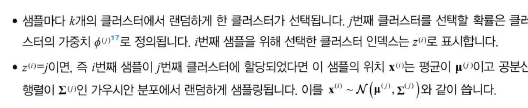

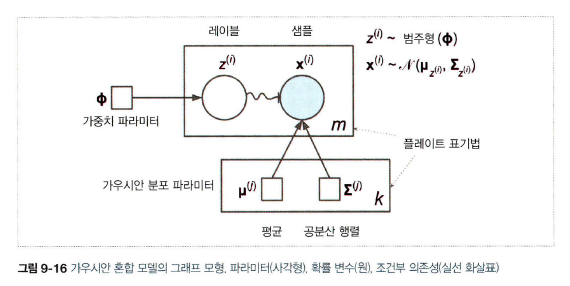

- 원 : 확률 변수

- 사각형 : 고정값(모델의 파라미터)

- 큰 사각형 : 플레이트 → 사각형 안의 내용이 여러 번 반복됨을 의미

- 각 플레이트 오른쪽 아래 숫자 : 플레이트 안의 내용이 얼마나 반복되는지를 표시

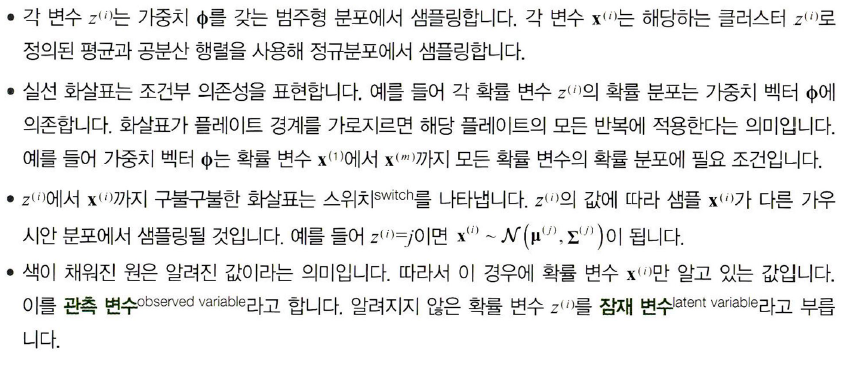

In [1]:
# 반달 모양 데이터셋에서 테스트
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise= 0.05)

In [2]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [4]:
gm.weights_

array([0.21699868, 0.57716315, 0.20583817])

In [5]:
gm.means_

array([[-0.7141362 ,  0.58666422],
       [ 0.51598025,  0.23458381],
       [ 1.74242195, -0.06987588]])

In [7]:
gm.covariances_

array([[[ 0.06883797,  0.07118737],
        [ 0.07118737,  0.09178846]],

       [[ 0.1606447 , -0.09535533],
        [-0.09535533,  0.28089771]],

       [[ 0.05623429,  0.06394537],
        [ 0.06394537,  0.08930782]]])

잘 작동함

**기댓값-최대화(EM) 알고리즘**

클러스터 파라미터를 랜덤하게 초기화하고 수렴할때까지 두 단계를 반복함

1. 샘플을 클러스터에 할당(기댓값 단계)

2. 클러스터를 업데이트함(최대화 단계)

k-평균과 달리 하드 클라스터 할당이 나닌 소프트 클러스터 할당 사용

클러스터에 속할 추정 확률로 샘플에 가중치가 적용되는데 이 확률을 샘플에 대한 클러스터의 책임이라고 부름

In [8]:
gm.converged_

True

In [9]:
gm.n_iter_

15

In [10]:
gm.predict(X) # 하드 군집

array([1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1,
       1, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1,
       1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1,
       1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1,
       0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0,

In [12]:
gm.predict_proba(X) # 소프트 군집

array([[1.59766453e-060, 1.00000000e+000, 6.88538965e-021],
       [8.74113552e-011, 1.00000000e+000, 1.00936177e-093],
       [3.28996769e-016, 1.00000000e+000, 4.56321289e-079],
       ...,
       [4.58783682e-137, 6.60877228e-005, 9.99933912e-001],
       [7.80910516e-149, 2.24296721e-003, 9.97757033e-001],
       [2.55158146e-118, 9.63154096e-001, 3.68459043e-002]])

In [17]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.56148502,  0.8600968 ],
       [ 0.69690071, -0.64646205],
       [ 0.87648046, -0.73612862],
       [ 0.97213248, -0.18183387],
       [ 0.42789101,  0.377405  ],
       [ 1.37599688, -0.44421765]])

In [18]:
y_new

array([0, 1, 1, 1, 1, 2])

In [19]:
# 확률 밀도 함수의 로그 예측
gm.score_samples(X)

array([-1.81475359, -1.50486157, -1.89661006, -1.47026309, -2.13170934,
       -1.84603495, -1.78060076, -1.71002151, -2.27222576, -1.89838775,
       -2.13728193, -2.07130641, -1.49731064, -1.29229225, -0.63476338,
       -1.64747782, -1.99293017, -0.03504755, -1.87833869, -1.94171206,
       -1.9843531 , -1.13176653, -1.51783208, -0.57245841, -1.35087209,
       -0.02979951, -1.9255742 , -1.53281343, -1.54169877, -1.13965738,
       -1.74632634, -1.4594291 , -2.10116281, -1.71723581, -0.72645847,
       -0.30012345, -0.79790697, -0.83171182, -2.16041421, -1.87344348,
       -2.11900506, -1.57744441, -1.6127485 , -1.49352391, -1.56093987,
       -0.10432937, -1.83048296, -0.53497934, -1.17590095, -1.34927782,
       -2.03792203, -2.16808233, -1.70150435, -1.62127345, -0.83130881,
       -1.55231666, -0.03547959, -1.75635532, -1.96299515, -1.95527391,
       -1.420782  , -1.39802211, -0.60275189, -0.01080479, -1.41318953,
       -1.63531742, -1.4720946 , -1.36594124, -0.25855887, -1.39

covariance_type 매개변수

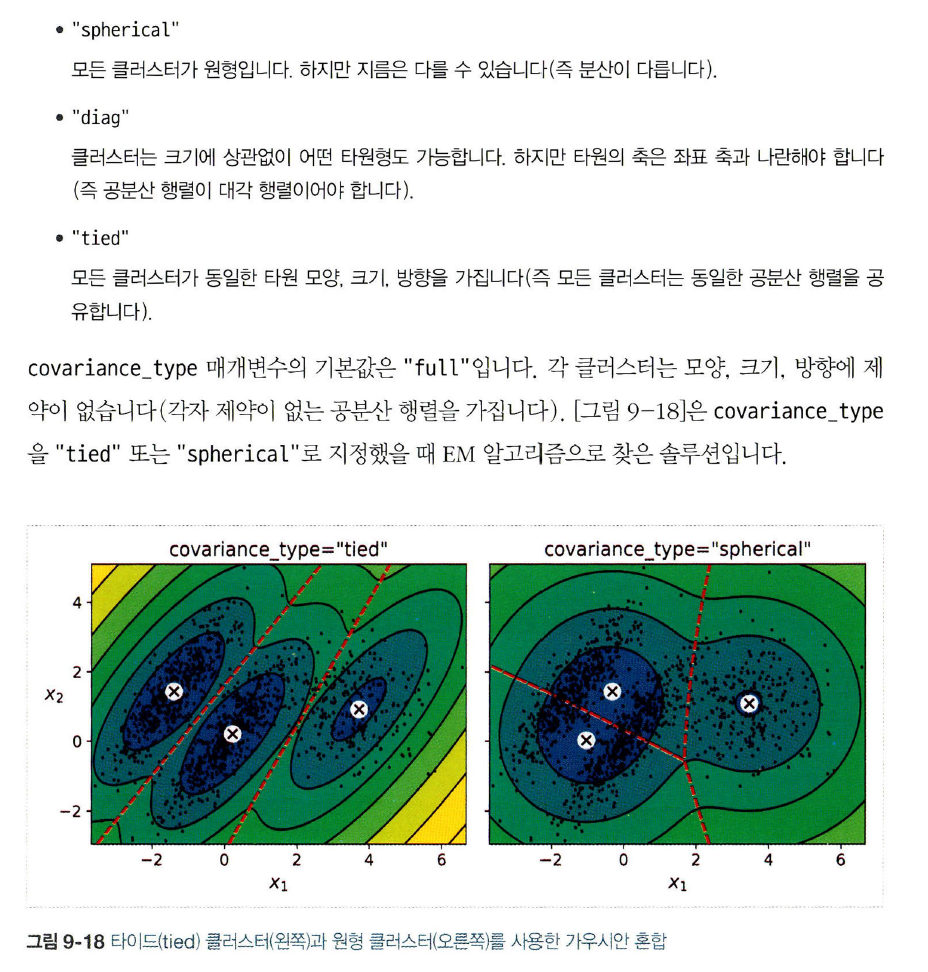

### 9.2.1 가우시안 혼합을 사용한 이상치 탐지

**이상치 탐지** : 보통과는 많이 다른 샘플을 감지하는 작업

이상치 vs 정상치

밀도가 낮은 지역에 있는 모든 샘플 → 이상치로 판단

이를 위해 밀도 임곗값 설정 필요

In [20]:
# 네 번째 백분위수(4%)를 밀도 임곗값으로 사용하여 이상치 구분
import numpy as np
densities = gm.score_samples(X)
density_threshold = np.percentile(densities,4)
anomalies = X[densities < density_threshold]

**특이치 탐지** : 이상치로 오염되지 않은 깨끗한 데이터셋에서 훈련

### 9.2.2 클러스터 개수 선택하기

BIC, AIC와 같은 이론적 정보 기준을 최소화하는 모델을 찾음

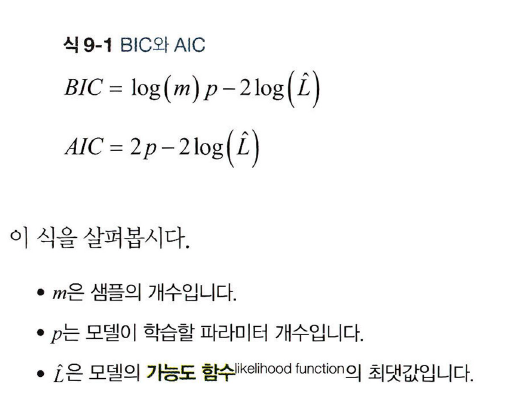

모두 학습할 파라미터가 많은 모델에게 벌칙을 가하고 데이터에 잘 학습하는 모델에게 보상을 더함

종종 동일 모델을 선택하지만 다를 경우 BIC가 더 간단한 모델을 선택하는 경향이 있음 하지만 대규모 데이터셋 같은 경우 잘 맞지 않을 수도 있음

In [21]:
gm.bic(X)

np.float64(2790.716288066664)

In [22]:
gm.aic(X)

np.float64(2707.284448323968)

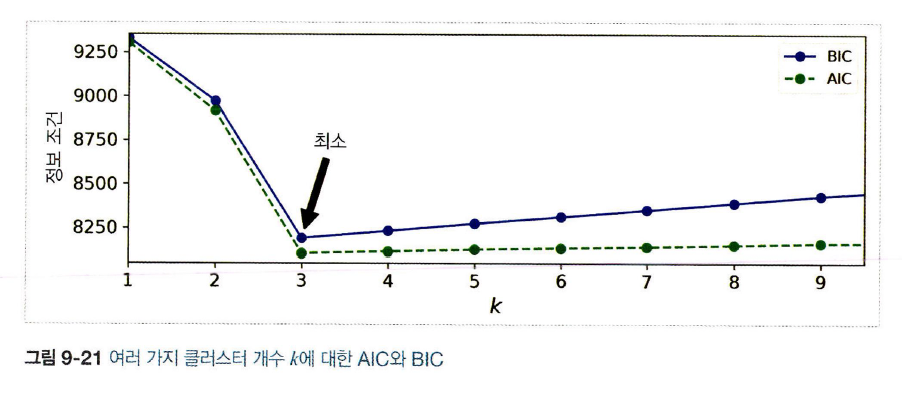

k=3일때 최선

### 9.2.3 베이즈 가우시안 혼합 모델

In [23]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components = 10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

/usr/local/lib/python3.11/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.13, 0.16, 0.2 , 0.14, 0.14, 0.12, 0.  , 0.1 , 0.  , 0.  ])

최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드는 방법도 가능함

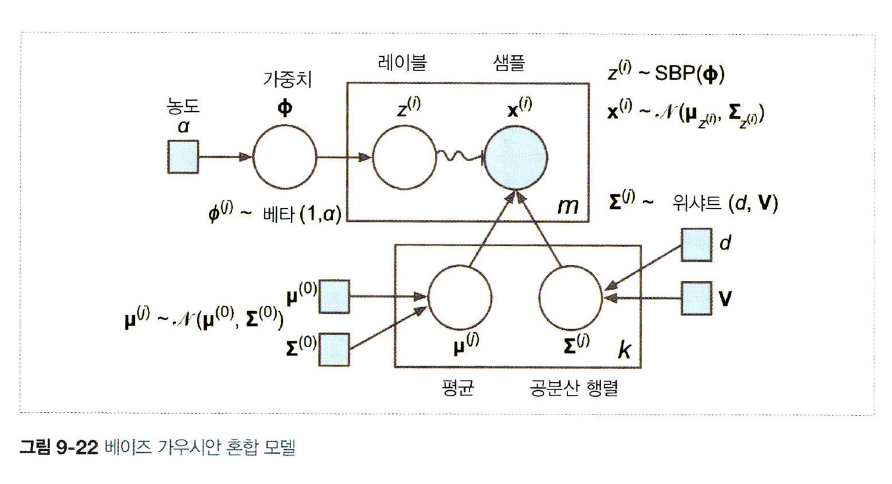

### 9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

- PCA

- Fast - MCD

- 아이솔레이션 포레스트

- LOF

- one - class SVM